In [12]:
from src.control.iterative_methods import policy_iteration, value_iteration
from src.processes.markov_decision_process import BaseMarkovDecisionProcessImpl
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [13]:
class MarkfrogDecisionProcess(BaseMarkovDecisionProcessImpl):
    def __init__(self, num_pads):
        # we init transitions as described in our problem formulation
        # states 1-n-1 have actions A and B
        # states 0 and n have actions S and E
        # states -1 and n+1 have only self looping actions
        transitions = {i: {'A': {i-1: i/num_pads, i+1: (num_pads-i)/num_pads},
                              'B': {j: 1/num_pads for j in range(0, num_pads+1) if j != i}}
                      for i in range(1, num_pads)}
        transitions[0] = {'S': {-1: 1}}
        transitions[-1] = {'S': {-1: 1}}
        transitions[num_pads] = {'E': {num_pads+1: 1}}
        transitions[num_pads+1] = {'E': {num_pads+1: 1}}

        # we init rewards as described in our problem formulation
        # states 1-n-1 have no rewards for actions
        # states 0 and n have rewards 0 and 1 actions S and E respectively
        # states -1 and n+1 have only self looping actions with 0 or 1 rewards
        
        rewards = {i: {'A': 0, 'B': 0} for i in range(1, num_pads)}        
        rewards[0] = {'S': 0}
        rewards[num_pads] = {'E': 1}
        rewards[-1] = {'S': 0}
        rewards[num_pads+1] = {'E': 0}
        terminal_states = {-1, num_pads+1}
        
        super().__init__(transitions, rewards, terminal_states, gamma=1)

In [14]:
frogger_test = MarkfrogDecisionProcess(10)
vf = value_iteration(frogger_test)
print('the vf is: ', vf)
policy = policy_iteration(frogger_test)
print('the policy is: ', policy)

the vf is:  {-1: 0, 0: 0, 1: 0.6757779522625639, 2: 0.7031210036155965, 3: 0.7099567782188074, 4: 0.7128864098996186, 5: 0.7148395142319336, 6: 0.716792638515729, 7: 0.7197223498849875, 8: 0.7265583761506307, 9: 0.7539025297739905, 10: 1, 11: 0}
the policy is:  {0: {('S', 1)}, 1: {('B', 1)}, 2: {('A', 1)}, 3: {('A', 1)}, 4: {('A', 1)}, 5: {('A', 1)}, 6: {('A', 1)}, 7: {('A', 1)}, 8: {('A', 1)}, 9: {('A', 1)}, 10: {('E', 1)}, 11: {('E', 1)}, -1: {('S', 1)}}


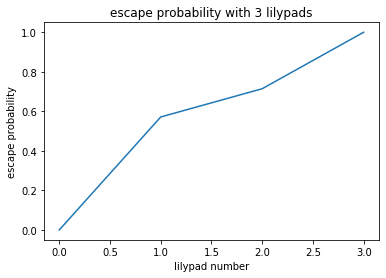

at lilypad 1, croak: {('B', 1)}
at lilypad 2, croak: {('A', 1)}


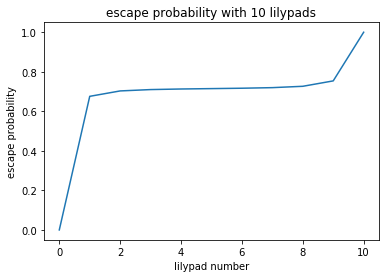

at lilypad 1, croak: {('B', 1)}
at lilypad 2, croak: {('A', 1)}
at lilypad 3, croak: {('A', 1)}
at lilypad 4, croak: {('A', 1)}
at lilypad 5, croak: {('A', 1)}
at lilypad 6, croak: {('A', 1)}
at lilypad 7, croak: {('A', 1)}
at lilypad 8, croak: {('A', 1)}
at lilypad 9, croak: {('A', 1)}


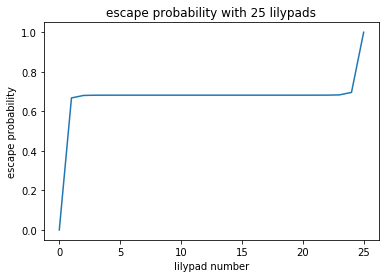

at lilypad 1, croak: {('B', 1)}
at lilypad 2, croak: {('A', 1)}
at lilypad 3, croak: {('A', 1)}
at lilypad 4, croak: {('A', 1)}
at lilypad 5, croak: {('A', 1)}
at lilypad 6, croak: {('A', 1)}
at lilypad 7, croak: {('A', 1)}
at lilypad 8, croak: {('A', 1)}
at lilypad 9, croak: {('A', 1)}
at lilypad 10, croak: {('A', 1)}
at lilypad 11, croak: {('A', 1)}
at lilypad 12, croak: {('A', 1)}
at lilypad 13, croak: {('A', 1)}
at lilypad 14, croak: {('A', 1)}
at lilypad 15, croak: {('A', 1)}
at lilypad 16, croak: {('A', 1)}
at lilypad 17, croak: {('A', 1)}
at lilypad 18, croak: {('A', 1)}
at lilypad 19, croak: {('A', 1)}
at lilypad 20, croak: {('A', 1)}
at lilypad 21, croak: {('A', 1)}
at lilypad 22, croak: {('A', 1)}
at lilypad 23, croak: {('A', 1)}
at lilypad 24, croak: {('A', 1)}


In [15]:
policies = []
value_funcs = []
for n in [3, 10, 25]:
    plt.figure()
    frogger = MarkfrogDecisionProcess(n)
    policy = policy_iteration(frogger)
    policies.append(policy)
    value_func = frogger.get_mrp(policy).get_value_func()
    sorted_pads = sorted(value_func.items())
    xs = [x[0] for x in sorted_pads][1:-1]
    ys = [x[1] for x in sorted_pads][1:-1]
    plt.plot(xs, ys)
    plt.ylabel('escape probability')
    plt.xlabel('lilypad number')
    plt.title(f"escape probability with {n} lilypads")
    plt.show()
    
    for i in range(1, n):
        print(f'at lilypad {i}, croak: {policy[i]}')
        


In [16]:
from typing import Mapping, Iterable
from src.utils.generic_typevars import S

class MarkJobDecisionProcess(BaseMarkovDecisionProcessImpl):

    def __init__(self, jobs: Iterable[S], wages: Mapping[S, float], alpha: float, unemployment: float, gamma,
                utility_func, job_probabilities: Mapping[S, float]):
        states: Sequence[(S, bool)] = [(j, False) for j in jobs] + [(j, True) for j in jobs]
        
        rewards = dict(
            ((job, first_day), {'Work': utility_func(wages[job]), 
                     "Quit": utility_func(unemplyment)})
               if first_day else ((job, first_day), {'Work': utility_func(wages[job])})
                for job, first_day in states)
        
        quit_transitions = {(job, True): job_probabilities[job] for job in jobs}
        fired_transitions = {(job, True): alpha*job_probabilities[job] for job in jobs }
        
        transitions = dict(
            ((job, first_day), {'Work': {(job, False): 1-alpha, **fired_transitions}, 
                                "Quit": quit_transitions})
                  if first_day else 
             ((job, first_day), {'Work': {(job, False): 1-alpha, **fired_transitions}})
              
             for job, first_day in states
        )
        terminal_states = []
        super().__init__(transitions, rewards, terminal_states, gamma)
        
            
        


In [17]:
jobs = [1,2,3,4,5]
wages = {1:1,2:2,3:3,4:4,5:100}
job_probs = {j: 1/len(jobs) for j in jobs}
unemplyment = 2.5
alpha = 0.2
gamma = 0.5
utility_func = lambda x: math.log(x)
jdp = MarkJobDecisionProcess(jobs, wages, alpha, unemplyment, gamma, utility_func, job_probs)
policy = policy_iteration(jdp)
policy

{(1, False): {('Work', 1)},
 (1, True): {('Quit', 1)},
 (2, False): {('Work', 1)},
 (2, True): {('Quit', 1)},
 (3, False): {('Work', 1)},
 (3, True): {('Quit', 1)},
 (4, False): {('Work', 1)},
 (4, True): {('Work', 1)},
 (5, False): {('Work', 1)},
 (5, True): {('Work', 1)}}

In [18]:
utility_func_2 = lambda x: x
jdp = MarkJobDecisionProcess(jobs, wages, alpha, unemplyment, gamma, utility_func_2, job_probs)
policy = policy_iteration(jdp)
policy

{(1, False): {('Work', 1)},
 (1, True): {('Quit', 1)},
 (2, False): {('Work', 1)},
 (2, True): {('Quit', 1)},
 (3, False): {('Work', 1)},
 (3, True): {('Quit', 1)},
 (4, False): {('Work', 1)},
 (4, True): {('Quit', 1)},
 (5, False): {('Work', 1)},
 (5, True): {('Work', 1)}}

In [19]:
# this is what we would expect, when we have a very risk averse outlook, i.e. utility is log(x), we are not
# as willing to quit our current job to get a potentially MUCH higher paying one
# however, when we use a linear utility, we are in fact willing to quit any job when we can except one that is 
# much higher paying

In [ ]:
# custom value iteration, if we were to optimize our value iteration algorithm to take advantage 
# the structure of the problem to reduce recomputation of specific values like the unemplyoment value
def iterate_on_value_function(jobs: Iterable[S], states: Iterable[(S, bool)], wages: Mapping[S, float], alpha: float, 
                              unemployment: float, gamma: float, utility_func: Mapping[float, float], 
                              job_probabilities: Mapping[S, float], current_vf) -> Mapping[(S, bool), float]:
    next_value_function: Mapping[(S, bool), float] = {}
    #we will use this value several times in the future calculations, i.e. current value of having a new job tomorrow
    unemployment_value = sum(current_vf[(job, true)]*job_probabilities[job] for job in jobs)
    for job, first_day in states:
        if first_day: # we are on our first day and can choose to work or not
            next_value_function[(job, first_day)] = max(
                utility_func(wages[job]) + gamma * (alpha * unemployment_value + \
                                                    (1-alpha) * current_value_function[(job, False)]),
                utility_func(unemployment) + gamma * unemployment_value
            )
        else: 
            next_value_function[(job, first_day)] = utility_func(wages[job]) + \
                gamma * (alpha * unemployment_value + (1-alpha) * current_value_function[(job, False)])
    

def custom_value_iteration(jobs: Iterable[S], wages: Mapping[S, float], alpha: float, 
                           unemployment: float, gamma: float, utility_func: Mapping[float, float], 
                           job_probabilities: Mapping[S, float]) -> Mapping[(S, bool), float]:
    '''
    jobs: the set of all jobs
    wages: the mapping from jobs to wages
    alpha: probability of being fired
    unemployment: w_0
    utility_func: utility function, CRRA, Linear, etc.
    job_probabilities: likelihood of getting each job after being unemployed
    '''
    # generate our states from our jobs
    states: Sequence[(S, bool)] = [(j, False) for j in jobs] + [(j, True) for j in jobs]
    base_value_function: Mapping[(S, bool), float] = defaultdict(int)#{...init value function...}
    next_value_function: Mapping[(S, bool), float] = iterate_on_value_function(jobs, states, wages, alpha, 
                                  unemployment, gamma, utility_func, 
                                  job_probabilities)
    #this is run of the mill value iteration loop
    while base_value_function is not equal to next_value_function up to epsilon tolerance:
        base_value_function = next_value_function
        next_value_function = iterate_on_value_function(jobs, states, wages, alpha, 
                                  unemployment, gamma, utility_func, 
                                  job_probabilities)
    return next_value_function
